In [ ]:
# # COMP 263 - DEEP LEARNING
# #  Autoencoders and Transfer Learning


In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input
import graphviz
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random

In [2]:
# Set random seeds for Python, NumPy, and TensorFlow
seed = 00
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
'''   ------------  Getting the data -------------     '''
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
# Dictionaries
unsupervised_stella = {'images': train_images}
supervised_stella = {'images': test_images, 'labels': test_labels}

In [7]:
np.amax (unsupervised_stella['images'])

255

In [8]:
'''  -------------------- Data Pre-processing ---------------'''
# # Normalize pixels for images in supervised and unsupervised dictionaries
unsupervised_stella['images']= np.array([i/255 for i in unsupervised_stella['images']])


In [9]:
np.amax (unsupervised_stella['images'])

1.0

In [10]:
supervised_stella['images'] = np.array([j/255 for j in supervised_stella['images']])

In [11]:
np.amax(supervised_stella['images'])

1.0

In [12]:
# # Apply to_categorical to the supervised dictionary labels
categorical = to_categorical(supervised_stella['labels'], dtype='object')
supervised_stella['labels'] = categorical

In [13]:
supervised_stella['labels'].shape  #changed to 10 cols -- encoding

(10000, 10)

In [14]:
# # Printing shapes
print(f"unsupervised dictionary images' shape: {unsupervised_stella['images'].shape}")
print (f"supervised dictionary images' shape: {supervised_stella['images'].shape}")
print (f"supervised dictionary labels' shape: {supervised_stella['labels'].shape}")


unsupervised dictionary images' shape: (60000, 28, 28)
supervised dictionary images' shape: (10000, 28, 28)
supervised dictionary labels' shape: (10000, 10)


In [15]:
''' --------------- Data Preparation ----------------'''

' --------------- Data Preparation ----------------'

In [16]:
# # Splitting unsupervised array
unsupervised_train_stella, unsupervised_val_stella = train_test_split(unsupervised_stella['images'], test_size=0.05, random_state=seed)

In [17]:
print (unsupervised_train_stella.shape)

(57000, 28, 28)


In [18]:
print(unsupervised_val_stella.shape)

(3000, 28, 28)


In [19]:
# # Discard 7000 samples from supervised dataset (x and y)
X, discard_x, y, discard_y = train_test_split(supervised_stella['images'], supervised_stella['labels'], test_size=0.70, random_state=seed)

In [20]:
print (X.shape)
print (y.shape)

(3000, 28, 28)
(3000, 10)


In [21]:
# # Split remaining supervised dataset (3000) into training (1800), validation (600) and testing (600)
x_full, x_test_stella, y_full, y_test_stella = train_test_split(X, y, test_size=0.20, random_state=seed)

In [22]:
x_train_stella, x_val_stella, y_train_stella, y_val_stella = train_test_split(x_full, y_full, test_size=0.25, random_state=seed)

In [23]:
# # Printing
print (f"Shape of unsupervised training set: {unsupervised_train_stella.shape}")
print (f"Shape of unsupervised validation set: {unsupervised_val_stella.shape}")
print(f"Shape of supervised images training set: {x_train_stella.shape}")
print(f"Shape of supervised images validation set: {x_val_stella.shape}")
print(f"Shape of supervised images testing set: {x_test_stella.shape}")
print(f"Shape of supervised label training set: {y_train_stella.shape}")
print(f"Shape of supervised label validation set: {y_val_stella.shape}")
print(f"Shape of supervised label testing  set: {y_test_stella.shape}")

Shape of unsupervised training set: (57000, 28, 28)
Shape of unsupervised validation set: (3000, 28, 28)
Shape of supervised images training set: (1800, 28, 28)
Shape of supervised images validation set: (600, 28, 28)
Shape of supervised images testing set: (600, 28, 28)
Shape of supervised label training set: (1800, 10)
Shape of supervised label validation set: (600, 10)
Shape of supervised label testing  set: (600, 10)


In [24]:
''' ------------------- Build, train and validate a baseline CNN model -------------'''

' ------------------- Build, train and validate a baseline CNN model -------------'

In [25]:
# # Build CNN using Sequential
im_height, im_width = 28,28
n_clases = 10
input_shape = (im_height, im_width, 1)

Using Sequential ()

In [26]:
cnn_v1_model_stella = Sequential()
cnn_v1_model_stella.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu',  input_shape=input_shape))
cnn_v1_model_stella.add(Conv2D(8, kernel_size=(3,3), strides=(2,2), padding = 'same', activation = 'relu'))
cnn_v1_model_stella.add(Flatten())
cnn_v1_model_stella.add(Dense(100, activation = 'relu'))
cnn_v1_model_stella.add(Dense(n_clases, activation = 'softmax'))

In [27]:
# # Compile the model
cnn_v1_model_stella.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [28]:
cnn_v1_model_stella.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 100)               39300     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 41630 (162.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


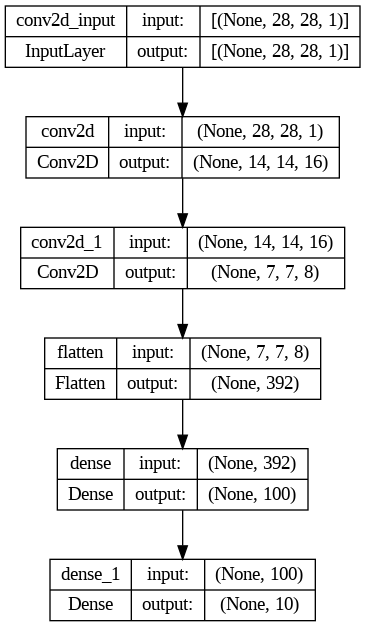

In [29]:
plot_model(cnn_v1_model_stella, to_file='cnn_v1_model_stella.png', show_shapes=True)

In [30]:
# # Use train/val supervised dataset to train and validate the cnn model

#  Reshape inputs
x_train_stella = x_train_stella.reshape(x_train_stella.shape[0], im_height, im_width, 1)
x_val_stella = x_val_stella.reshape(x_val_stella.shape[0], im_height, im_width, 1)


In [31]:
# converting labels to float
y_train_stella = y_train_stella.astype('float64')
y_val_stella = y_val_stella.astype('float64')

In [32]:
# Fit the model
batch_size = 256
epochs = 10
cnn_v1_history_stella = cnn_v1_model_stella.fit(x_train_stella, y_train_stella, batch_size=batch_size, epochs = epochs, validation_data= (x_val_stella, y_val_stella))

Epoch 1/10
8/8 [==============================] - 2s 118ms/step - loss: 2.2379 - accuracy: 0.2450 - val_loss: 2.0897 - val_accuracy: 0.4267
Epoch 2/10
8/8 [==============================] - 0s 56ms/step - loss: 1.9700 - accuracy: 0.4683 - val_loss: 1.7500 - val_accuracy: 0.4500
Epoch 3/10
8/8 [==============================] - 0s 53ms/step - loss: 1.5776 - accuracy: 0.5333 - val_loss: 1.3248 - val_accuracy: 0.6317
Epoch 4/10
8/8 [==============================] - 0s 53ms/step - loss: 1.1711 - accuracy: 0.6444 - val_loss: 1.0151 - val_accuracy: 0.6683
Epoch 5/10
8/8 [==============================] - 0s 48ms/step - loss: 0.9442 - accuracy: 0.6933 - val_loss: 0.8639 - val_accuracy: 0.7000
Epoch 6/10
8/8 [==============================] - 0s 41ms/step - loss: 0.8324 - accuracy: 0.7122 - val_loss: 0.8326 - val_accuracy: 0.7083
Epoch 7/10
8/8 [==============================] - 0s 28ms/step - loss: 0.8294 - accuracy: 0.7161 - val_loss: 0.7966 - val_accuracy: 0.7150
Epoch 8/10
8/8 [==========

In [33]:
''' -------------- Test and Analyze the baseline model ---------------------'''

' -------------- Test and Analyze the baseline model ---------------------'

In [34]:
cnn_v1_history_stella.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
acc_train = cnn_v1_history_stella.history['accuracy']
print(acc_train)

[0.24500000476837158, 0.46833333373069763, 0.5333333611488342, 0.644444465637207, 0.6933333277702332, 0.7122222185134888, 0.7161111235618591, 0.7255555391311646, 0.746666669845581, 0.7505555748939514]


In [36]:
acc_val = cnn_v1_history_stella.history['val_accuracy']
print(acc_val)

[0.4266666769981384, 0.44999998807907104, 0.6316666603088379, 0.6683333516120911, 0.699999988079071, 0.7083333134651184, 0.7149999737739563, 0.7149999737739563, 0.7233333587646484, 0.7300000190734863]


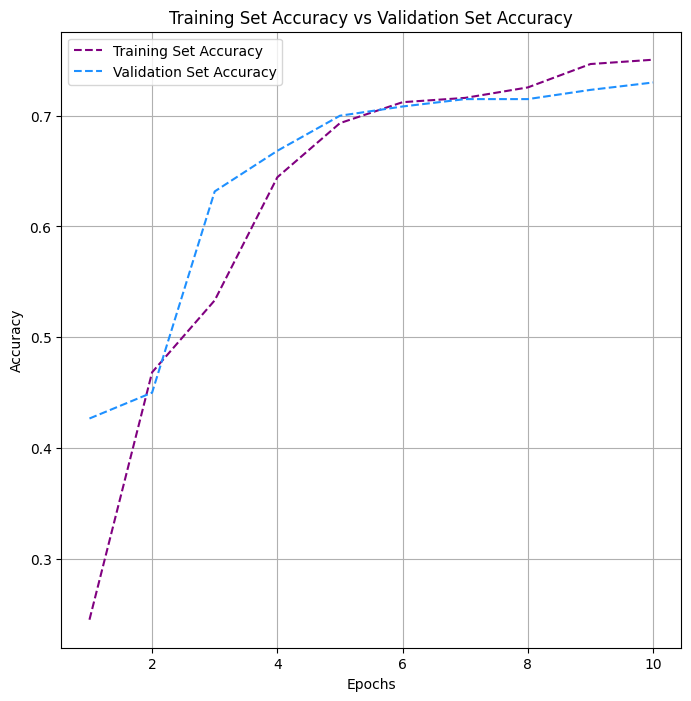

In [37]:
x_range = np.arange (1, 11, 1)
plt.figure (figsize=(8,8))
plt.plot(x_range, acc_train,  linestyle='--', color='purple', label = 'Training Set Accuracy')
plt.plot(x_range, acc_val, linestyle='--', color='dodgerblue', label = 'Validation Set Accuracy')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title ('Training Set Accuracy vs Validation Set Accuracy')
plt.legend()
plt.show()

In [ ]:
# # Evaluate the cnn model

In [38]:
# Reshape x_test
x_test_stella = x_test_stella.reshape(x_test_stella.shape[0], im_height, im_width, 1)

In [39]:
# Converting to float y_test
y_test_stella = y_test_stella.astype('float64')

In [40]:
# Evaluating
evaluation = cnn_v1_model_stella.evaluate(x_test_stella, y_test_stella)

19/19 [==============================] - 0s 4ms/step - loss: 0.7654 - accuracy: 0.7133


In [41]:
print (f"Test accuracy: {evaluation[1]}")

Test accuracy: 0.7133333086967468


In [42]:
# # Predictions
cnn_predictions_stella = cnn_v1_model_stella.predict(x_test_stella)

19/19 [==============================] - 0s 3ms/step


In [43]:
print(y_test_stella[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [44]:
print(np.argmax(y_test_stella[0]))

3


In [45]:
indices = []
for i, j in enumerate(y_test_stella):
  indices.append (np.argmax(y_test_stella[i]))

In [46]:
print (indices[0])

3


In [47]:
y_test_2 = indices

In [48]:
y_pred = []
for i, j in enumerate(cnn_predictions_stella):
  y_pred.append(np.argmax(cnn_predictions_stella[i]))

In [49]:
print(y_pred[0])

3


In [50]:
# # Plot confusion matrix
cm = confusion_matrix(y_test_2, y_pred, labels = np.arange(0,10))

In [51]:
print (cm)

[[40  1  0  9  0  2  6  0  4  0]
 [ 0 44  2  1  0  0  1  0  1  0]
 [ 0  1 41  1  6  0  7  0  4  0]
 [ 1 10  0 43  0  0  2  0  0  0]
 [ 0  7 23  5 30  0  1  0  2  0]
 [ 0  0  0  0  0 55  0  7  0  2]
 [10  0 16  5  7  0 15  0  3  0]
 [ 0  0  0  0  0  1  0 49  0  7]
 [ 0  0  1  3  0  3  1  2 57  1]
 [ 0  0  0  0  0  3  0  3  0 54]]


In [52]:
labels = np.arange(0,10,1)

In [53]:
print(labels)

[0 1 2 3 4 5 6 7 8 9]


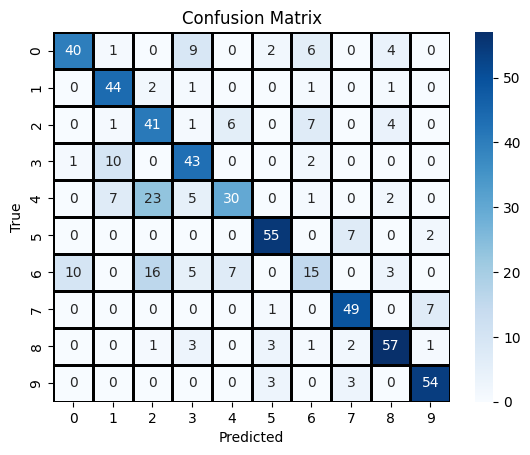

In [54]:
# Seaborn to the rescue
ax = sns.heatmap(cm, annot=True, annot_kws={'size': 10}, xticklabels=labels, yticklabels=labels, cmap='Blues', linewidths=1, linecolor='black')
ax.set_xlabel ('Predicted', fontsize=10)
ax.set_ylabel('True', fontsize=10)
plt.title ('Confusion Matrix')
plt.axis()
plt.show()

In [55]:
''' ----------- Add random noise to the unsupervised dataset ------------'''
noise_factor = 0.2

In [56]:
# # Adding noise to the unsupervised dataset
pure_train = unsupervised_train_stella
pure_val = unsupervised_val_stella

In [57]:
noise_train = tf.random.normal(pure_train.shape, seed=seed)
noise_val = tf.random.normal(pure_val.shape, seed=seed)

In [58]:
x_train_noisy_stella = pure_train + (noise_train*noise_factor)
x_val_noisy_stella = pure_val +(noise_val*noise_factor)

In [59]:
print(np.amax(x_train_noisy_stella))
print(np.amin(x_train_noisy_stella))

1.9339437
-1.029996


In [60]:
# # Clipping values to a range between 0 and 1
min_val = 0
max_val=1
x_train_noisy_stella = tf.clip_by_value(x_train_noisy_stella,  clip_value_min=min_val, clip_value_max=max_val)


In [61]:
print (np.amax(x_train_noisy_stella))
print (np.amin(x_train_noisy_stella))

1.0
0.0


In [62]:
x_val_noisy_stella = tf.clip_by_value(x_val_noisy_stella, clip_value_min=min_val, clip_value_max=max_val)

In [63]:
print (np.amax(x_val_noisy_stella))
print (np.amin(x_val_noisy_stella))

1.0
0.0


In [64]:
print(x_val_noisy_stella.shape)

(3000, 28, 28)


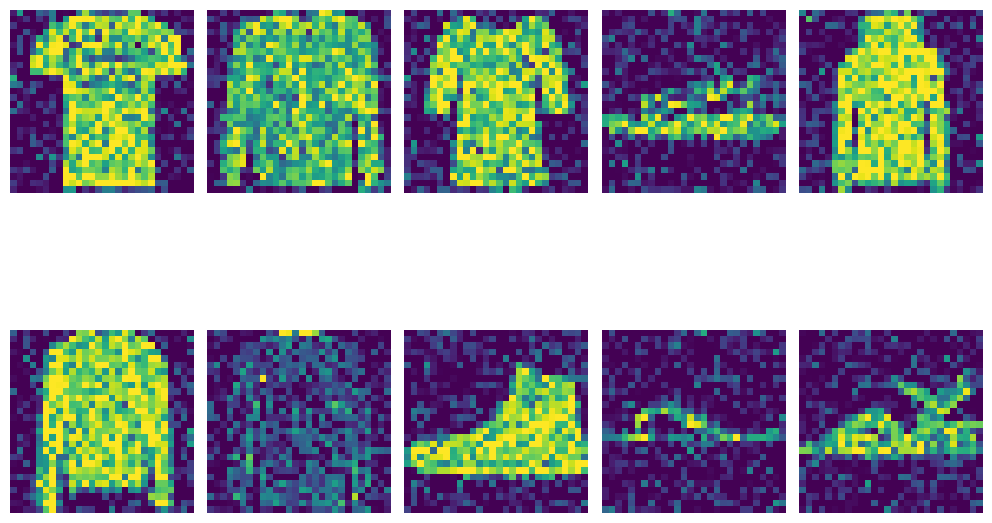

In [65]:
# # Plot first 10 images from x_val_noisy
n_vis = 10
plt.figure(figsize=(10,8))
count = 0
for i in range(0, n_vis):
  noisy_val_im = x_val_noisy_stella[i][:,:]
  plt.subplot(2, 5, count+1) #rows 2, cols 5, count+1 position
  plt.axis('off')
  plt.imshow(noisy_val_im)
  count+=1
plt.tight_layout(pad=1, w_pad=1)
plt.show()

In [ ]:
''' ---------------- Build and pretrain Autoencoder -------------------'''

' ---------------- Build and pretrain Autoencoder -------------------'

In [66]:
from keras.api._v2.keras import activations
# # Building Autoencoder model
#Input - shape must include the channel as third parameter
inputs_stella = Input(shape=input_shape, name='inputs_stella')

#Encoder Section
e_stella = Conv2D(16, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(inputs_stella)
e_stella = Conv2D(8, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(e_stella)

In [67]:
# Decoder Section
d_stella = Conv2DTranspose(8, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(e_stella)
d_stella = Conv2DTranspose(16, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(d_stella)
d_stella = Conv2D(1, kernel_size=(3,3), padding='same', activation='sigmoid') (d_stella)

In [68]:
# # Compile model
autoencoder_stella = keras.Model(inputs=[inputs_stella], outputs=[d_stella])
autoencoder_stella.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
# # Display summary of the model
autoencoder_stella.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_stella (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         145   

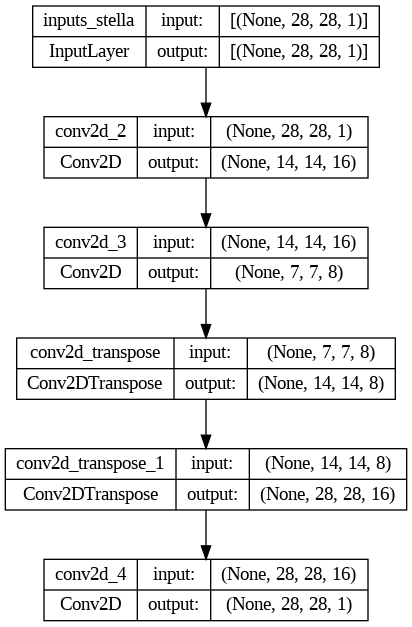

In [70]:
# Plot diagram
plot_model(autoencoder_stella, to_file = "autoencoder.png", show_shapes=True)

In [71]:
# Train and validate the model
epochs_auto = 10
batch_size_auto = 256
autoencoder_history_stella = autoencoder_stella.fit(x_train_noisy_stella, pure_train, epochs=epochs_auto, batch_size=batch_size_auto, validation_data =(x_val_noisy_stella, pure_val))

Epoch 1/10
223/223 [==============================] - 44s 192ms/step - loss: 0.0497 - val_loss: 0.0165
Epoch 2/10
223/223 [==============================] - 41s 185ms/step - loss: 0.0145 - val_loss: 0.0130
Epoch 3/10
223/223 [==============================] - 56s 251ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 4/10
223/223 [==============================] - 61s 275ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 5/10
223/223 [==============================] - 51s 227ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 6/10
223/223 [==============================] - 58s 259ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 7/10
223/223 [==============================] - 59s 265ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 8/10
223/223 [==============================] - 44s 196ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 9/10
223/223 [==============================] - 46s 208ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 10/10
223/223 [==============================] - 44s 195ms/step - l

In [72]:
print(autoencoder_history_stella.history.keys())

dict_keys(['loss', 'val_loss'])


In [73]:
print (autoencoder_history_stella.history['loss'])
print (autoencoder_history_stella.history['val_loss'])

[0.04971378296613693, 0.014498372562229633, 0.012247886508703232, 0.011166309006512165, 0.0104398587718606, 0.009972389787435532, 0.009661051444709301, 0.009408466517925262, 0.009196417406201363, 0.00900626927614212]
[0.016490455716848373, 0.01299363560974598, 0.011605799198150635, 0.010755864903330803, 0.010243372060358524, 0.009786729700863361, 0.009510255418717861, 0.009296922944486141, 0.00910197477787733, 0.008920943364501]


In [74]:
# # Predictions
autoencoder_predictions_stella = autoencoder_stella.predict(unsupervised_val_stella)

94/94 [==============================] - 2s 14ms/step


In [75]:
autoencoder_predictions_stella[0].shape

(28, 28, 1)

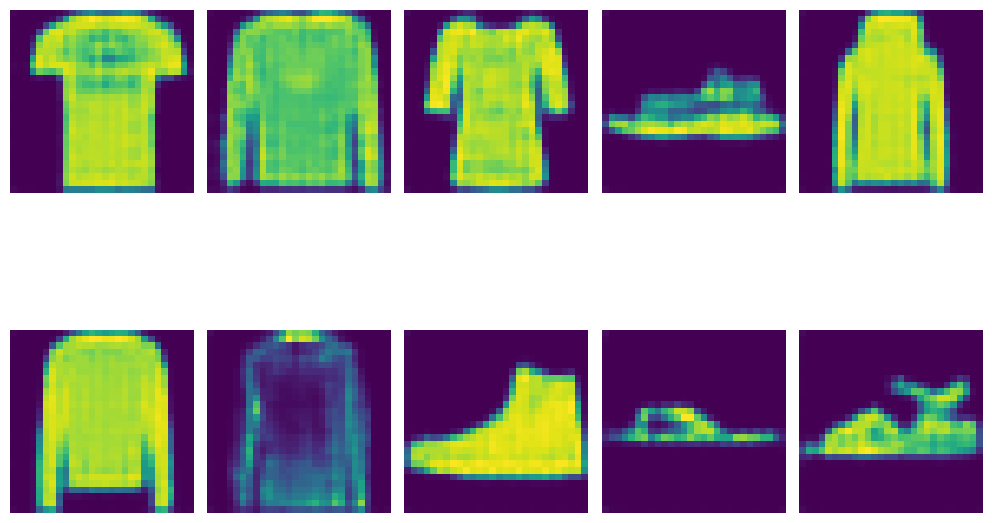

In [76]:
n_vis = 10
plt.figure(figsize=(10,8))
count = 0
for i in range(0, n_vis):
  noisy_pred_im = np.mean(autoencoder_predictions_stella[i], axis=2)
  plt.subplot(2, 5, count+1) #rows 2, cols 5, count+1 position
  plt.axis('off')
  plt.imshow(noisy_pred_im)
  count+=1
plt.tight_layout(pad=1, w_pad=1)
plt.show()


In [ ]:
''' ---------------------------  Build and Perform transfer learning on a CNN with the Autoencoder ------------------- '''

' ---------------------------  Build and Perform transfer learning on a CNN with the Autoencoder ------------------- '

In [78]:
# Base model
# inputs_cnn_v2 = autoencoder_stella(inputs_stella, training = False)   # it worked
# encoder_cnn_v2 = autoencoder_stella (e_stella, training=False) # Didn't work

ValueError: ignored

In [79]:
# Base model

base_model_stella = keras.Model (inputs=inputs_stella, outputs=e_stella)

for layer in base_model_stella.layers:
  layer.training = False

In [95]:
# # Building a CNN model using certain layers from the autoencoder
#Input - shape must include the channel as third parameter
#inputs_stella = Input(shape=input_shape, name='inputs_stella')

#Encoder Section
# e_stella = Conv2D(16, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(inputs_stella)
# e_stella = Conv2D(8, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')(e_stella)

# Base model
#base_model_stella = keras.Model(input=autoencoder_stella.inputs_stella, output= autencoder_stella.e_stella)

# Flatten layer
f_stella= Flatten()(base_model_stella.output)  #alternative e_stella directly

# Fully connected layer
d_stella = Dense(100, activation='relu')(f_stella)

# Output layer
o_stella = Dense (10, activation='softmax')(d_stella)

In [96]:
# # Compile
cnn_v2_stella = keras.Model(inputs=[base_model_stella.inputs], outputs=[o_stella])
cnn_v2_stella.compile(optimizer='adam', loss='categorical_crossentropy', metrics ='accuracy')

In [97]:
# # Display/print summary
cnn_v2_stella.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_stella (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten_2 (Flatten)         (None, 392)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               39300     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 41630 (16

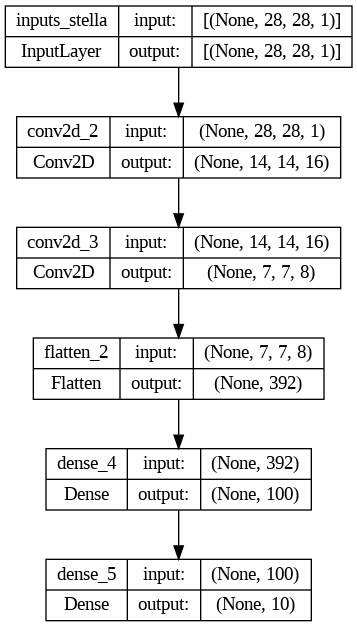

In [98]:
# Plot structure of the CNN
plot_model(cnn_v2_stella, to_file = "cnn_v2.png", show_shapes=True)

In [99]:
# # Fit and Train model
batch_size_2 = 256
epochs_2 = 10
cnn_v2_history_stella = cnn_v2_stella.fit(x_train_stella, y_train_stella, batch_size=batch_size_2, epochs=epochs_2, validation_data=(x_val_stella, y_val_stella))

Epoch 1/10
8/8 [==============================] - 1s 51ms/step - loss: 2.4643 - accuracy: 0.2683 - val_loss: 1.4803 - val_accuracy: 0.4767
Epoch 2/10
8/8 [==============================] - 0s 28ms/step - loss: 1.2983 - accuracy: 0.5378 - val_loss: 1.0864 - val_accuracy: 0.5867
Epoch 3/10
8/8 [==============================] - 0s 27ms/step - loss: 1.0115 - accuracy: 0.6256 - val_loss: 0.9559 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 0s 27ms/step - loss: 0.8864 - accuracy: 0.6644 - val_loss: 0.8610 - val_accuracy: 0.6850
Epoch 5/10
8/8 [==============================] - 0s 27ms/step - loss: 0.8387 - accuracy: 0.7022 - val_loss: 0.7799 - val_accuracy: 0.7250
Epoch 6/10
8/8 [==============================] - 0s 28ms/step - loss: 0.7804 - accuracy: 0.7178 - val_loss: 0.7943 - val_accuracy: 0.7117
Epoch 7/10
8/8 [==============================] - 0s 27ms/step - loss: 0.7965 - accuracy: 0.7161 - val_loss: 0.7959 - val_accuracy: 0.6867
Epoch 8/10
8/8 [===========

In [ ]:
'''  ------------------ Test and Analyze the pretrained CNN model -----------------------'''

In [100]:
# # Training and Validation Accuracy
acc_train_2 = cnn_v2_history_stella.history['accuracy']
acc_val_2 = cnn_v2_history_stella.history['val_accuracy']

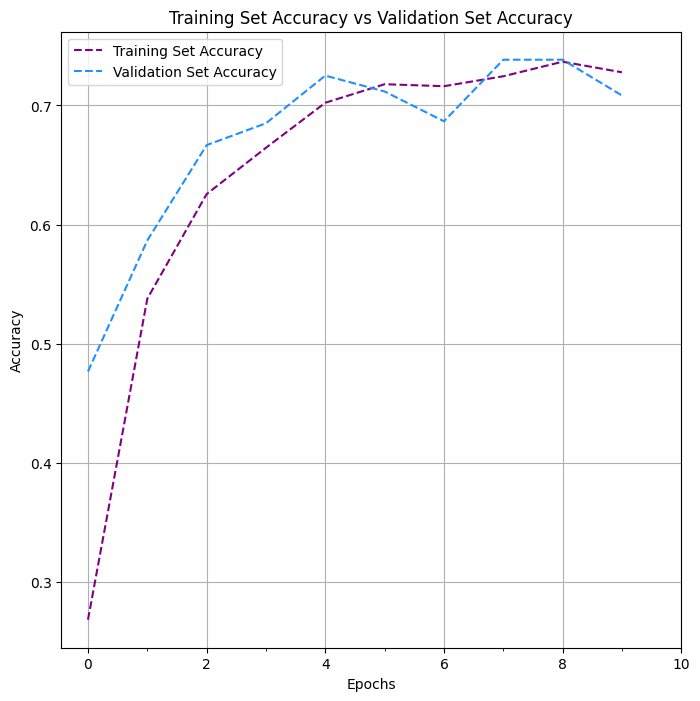

In [101]:
# Plot accuracies
x_range_2 = np.arange (0, 10, 1)
plt.figure (figsize=(8,8))
plt.plot(acc_train_2,  linestyle='--', color='purple', label = 'Training Set Accuracy')
plt.plot(acc_val_2, linestyle='--', color='dodgerblue', label = 'Validation Set Accuracy')
plt.grid()
plt.xticks(x_range, minor=True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title ('Training Set Accuracy vs Validation Set Accuracy')
plt.legend()
plt.show()

In [102]:
# # Evaluate CNN model with test data

score_cnn_v2_stella = cnn_v2_stella.evaluate(x_test_stella, y_test_stella)

19/19 [==============================] - 0s 5ms/step - loss: 0.8222 - accuracy: 0.6933


In [103]:
# # Predictions on the test dataset

cnn_v2_predictions_stella = cnn_v2_stella.predict(x_test_stella)

19/19 [==============================] - 0s 2ms/step


In [104]:
print(cnn_v2_predictions_stella[0][0])

0.030739572


In [105]:
y_cnn2_pred = []
for i, j in enumerate(cnn_v2_predictions_stella):
  y_cnn2_pred.append(np.argmax(cnn_v2_predictions_stella[i]))

In [106]:
print(y_cnn2_pred[0])

3


In [110]:
# # Confusion Matrix

cm_2 = confusion_matrix(y_test_2, y_cnn2_pred, labels=(np.arange(0,10,1)))

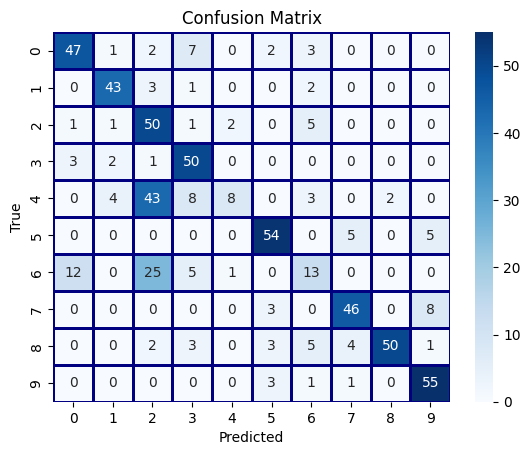

In [111]:
# # Seaborn

ax = sns.heatmap(cm_2, annot=True,  annot_kws={'size': 10},  cmap='Blues', linewidths=1, linecolor='navy')
ax.set_xlabel ('Predicted', fontsize=10)
ax.set_ylabel('True', fontsize=10)
plt.title ('Confusion Matrix')
plt.axis()
plt.show()

In [ ]:
''' --------------------  Compare the performance of the baseline CNN Model to the pretrained CNN v2 ------------------------------'''

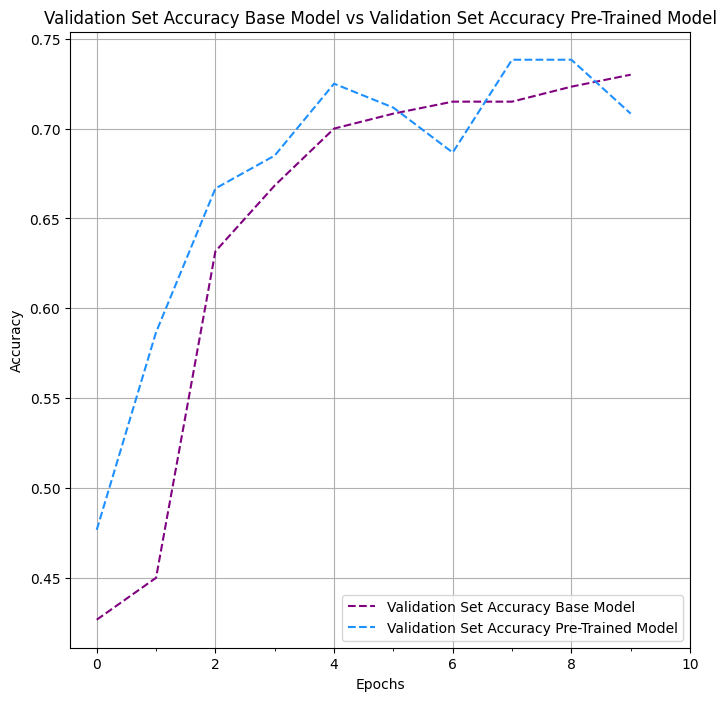

In [112]:
# # Plot Validation Accuracy of both models and compare

# Plot accuracies
x_range_f = np.arange (0, 10, 1)
plt.figure (figsize=(8,8))
plt.plot(acc_val,  linestyle='--', color='purple', label = 'Validation Set Accuracy Base Model')
plt.plot(acc_val_2, linestyle='--', color='dodgerblue', label = 'Validation Set Accuracy Pre-Trained Model')
plt.grid()
plt.xticks(x_range, minor=True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title ('Validation Set Accuracy Base Model vs Validation Set Accuracy Pre-Trained Model')
plt.legend()
plt.show()